Installing PAckages

In [ ]:
pip install yfinance

In [ ]:
pip install --upgrade yfinance pandas


imprting yfinance library for fetching stock market data

In [225]:
import yfinance as yf

fetching stock data

In [227]:
nvidia = yf.Ticker("NVDA")
nvda = nvidia.history(period="max")
print(nvda)

                                 Open        High         Low       Close  \
Date                                                                        
1999-01-22 00:00:00-05:00    0.040125    0.044783    0.035587    0.037618   
1999-01-25 00:00:00-05:00    0.040603    0.042036    0.037618    0.041559   
1999-01-26 00:00:00-05:00    0.042036    0.042872    0.037737    0.038334   
1999-01-27 00:00:00-05:00    0.038453    0.039409    0.036303    0.038215   
1999-01-28 00:00:00-05:00    0.038215    0.038453    0.037856    0.038095   
...                               ...         ...         ...         ...   
2024-09-09 00:00:00-04:00  104.871024  106.540887  103.681131  106.460892   
2024-09-10 00:00:00-04:00  107.800776  109.390643  104.941020  108.090752   
2024-09-11 00:00:00-04:00  109.380641  117.179976  107.410808  116.900002   
2024-09-12 00:00:00-04:00  116.839996  120.790001  115.379997  119.139999   
2024-09-13 00:00:00-04:00  119.080002  119.959999  117.599998  119.099998   

In [229]:
nvda.index

DatetimeIndex(['1999-01-22 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-01-26 00:00:00-05:00', '1999-01-27 00:00:00-05:00',
               '1999-01-28 00:00:00-05:00', '1999-01-29 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-02 00:00:00-05:00',
               '1999-02-03 00:00:00-05:00', '1999-02-04 00:00:00-05:00',
               ...
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00',
               '2024-09-10 00:00:00-04:00', '2024-09-11 00:00:00-04:00',
               '2024-09-12 00:00:00-04:00', '2024-09-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6453, freq=None)

DATA visualization

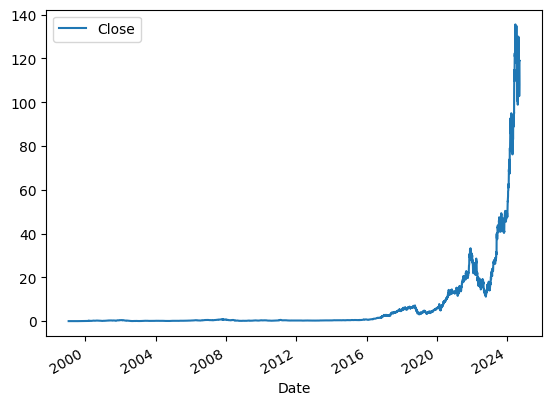

In [231]:
import matplotlib.pyplot as plt
nvda.plot.line(y="Close", use_index=True)
plt.show()

now we create  two new columns: Tommorow, which shifts the 'Close' price by one day

In [233]:
nvda["Tommorow"]=nvda["Close"].shift(-1)

In [235]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tommorow
Date,,,,,,,,
1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.00,0.0,0.041559
1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.00,0.0,0.038334
1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.00,0.0,0.038215
1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.00,0.0,0.038095
1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.00,0.0,0.036303
...,...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,104.871024,106.540887,103.681131,106.460892,273912000,0.00,0.0,108.090752
2024-09-10 00:00:00-04:00,107.800776,109.390643,104.941020,108.090752,268283700,0.00,0.0,116.900002
2024-09-11 00:00:00-04:00,109.380641,117.179976,107.410808,116.900002,441422400,0.00,0.0,119.139999


Target-->indicates whether the stock price increased (1) or decreased (0) the next day. This binary target will be used for prediction....

In [237]:
nvda["Target"]=(nvda["Tommorow"]>nvda["Close"]).astype(int)

In [239]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tommorow,Target
Date,,,,,,,,,
1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.00,0.0,0.041559,1
1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.00,0.0,0.038334,0
1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.00,0.0,0.038215,0
1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.00,0.0,0.038095,0
1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.00,0.0,0.036303,0
...,...,...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,104.871024,106.540887,103.681131,106.460892,273912000,0.00,0.0,108.090752,1
2024-09-10 00:00:00-04:00,107.800776,109.390643,104.941020,108.090752,268283700,0.00,0.0,116.900002,1
2024-09-11 00:00:00-04:00,109.380641,117.179976,107.410808,116.900002,441422400,0.00,0.0,119.139999,1


Filtering data from JAN 1 2001 onwards...

In [241]:
nvda=nvda.loc["2000-01-01":].copy()

In [243]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tommorow,Target
Date,,,,,,,,,
2000-01-03 00:00:00-05:00,0.090282,0.090999,0.084311,0.089446,300912000,0.00,0.0,0.087058,0
2000-01-04 00:00:00-05:00,0.087893,0.088132,0.082639,0.087058,300480000,0.00,0.0,0.084191,0
2000-01-05 00:00:00-05:00,0.084550,0.085983,0.082997,0.084191,188352000,0.00,0.0,0.078698,0
2000-01-06 00:00:00-05:00,0.084191,0.084191,0.075474,0.078698,120480000,0.00,0.0,0.080012,1
2000-01-07 00:00:00-05:00,0.078340,0.080848,0.077146,0.080012,71184000,0.00,0.0,0.082639,1
...,...,...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,104.871024,106.540887,103.681131,106.460892,273912000,0.00,0.0,108.090752,1
2024-09-10 00:00:00-04:00,107.800776,109.390643,104.941020,108.090752,268283700,0.00,0.0,116.900002,1
2024-09-11 00:00:00-04:00,109.380641,117.179976,107.410808,116.900002,441422400,0.00,0.0,119.139999,1


OUR "state of the art" MODEL(Random Forest)😎

In [245]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = nvda.iloc[:-100]
test= nvda.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [247]:
from sklearn.metrics import precision_score
predictions=model.predict(test[predictors])

In [249]:
import pandas as pd
predictions=pd.Series(predictions,index=test.index)

In [251]:
precision_score(test["Target"],predictions)

np.float64(0.75)

Combining actual data and predicted data

In [253]:
combined=pd.concat([test["Target"],predictions],axis=1)

<Axes: xlabel='Date'>

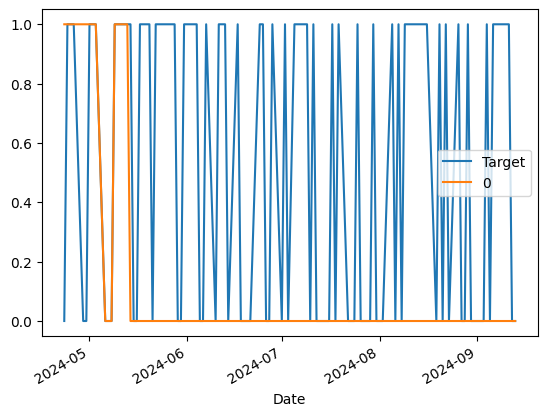

In [255]:
combined.plot()

In [257]:
def predict(train, test, predictors, model):
    predictions = model.predict(test[predictors])
    predictions = pd.Series(predictions, index=test.index, name="Prediction")  
    combined = pd.concat([test["Target"], predictions], axis=1)
    return combined


Creating a backtest func

In [259]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]

    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [261]:
predictions = backtest(nvda, model, predictors)

In [263]:
print(predictions.columns)

Index(['Target', 'Prediction'], dtype='object')


In [265]:
predictions["Prediction"].value_counts()

Prediction
1    2271
0    1443
Name: count, dtype: int64

In [267]:
precision_score(predictions["Target"], predictions["Prediction"])

np.float64(0.7291941875825627)

In [269]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.528271
0    0.471729
Name: count, dtype: float64

Adding predictors to imprve the mOdel....rolling avgs

In [273]:
horizons=[2,5,60,250,1000]

new_predictors=[]

for horizon in horizons:
    rolling_averages=nvda.rolling(horizon).mean()
    ratio_column=f"Close Ratio_{horizon}"
    nvda[ratio_column]=nvda["Close"]/rolling_averages["Close"]
    trend_column=f"Trend_{horizon}"
    nvda[trend_column]=nvda.shift(1).rolling(horizon).sum()["Target"]
    new_predictors+=[ratio_column,trend_column]

In [275]:
nvda=nvda.dropna()

In [277]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tommorow,Target,Close Ratio_2,Trend_2,Close Ratio_5,Trend_5,Close Ratio_60,Trend_60,Close Ratio_250,Trend_250,Close Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,0.167914,0.174793,0.167226,0.173800,363960000,0.00,0.0,0.181137,1,1.021104,1.0,1.046287,4.0,1.177283,34.0,1.291600,134.0,0.809514,483.0
2003-12-29 00:00:00-05:00,0.177086,0.181749,0.176246,0.181137,756624000,0.00,0.0,0.181519,1,1.020672,2.0,1.064690,4.0,1.219251,34.0,1.342408,135.0,0.843319,484.0
2003-12-30 00:00:00-05:00,0.179226,0.184959,0.179073,0.181519,550884000,0.00,0.0,0.177315,0,1.001055,2.0,1.042125,4.0,1.214567,34.0,1.341765,135.0,0.844717,485.0
2003-12-31 00:00:00-05:00,0.181442,0.182283,0.174411,0.177315,497268000,0.00,0.0,0.176398,0,0.988284,1.0,1.007030,3.0,1.179849,34.0,1.307471,135.0,0.824774,485.0
2004-01-02 00:00:00-05:00,0.180144,0.182589,0.176398,0.176398,436416000,0.00,0.0,0.182130,1,0.997407,0.0,0.990812,3.0,1.167532,33.0,1.297849,134.0,0.820140,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-06 00:00:00-04:00,108.030759,108.140750,100.941361,102.821205,413638100,0.00,0.0,106.460892,1,0.979147,1.0,0.945789,2.0,0.855522,29.0,1.282659,142.0,2.842799,537.0
2024-09-09 00:00:00-04:00,104.871024,106.540887,103.681131,106.460892,273912000,0.00,0.0,108.090752,1,1.017391,1.0,1.003071,2.0,0.888112,29.0,1.324013,143.0,2.935801,538.0
2024-09-10 00:00:00-04:00,107.800776,109.390643,104.941020,108.090752,268283700,0.00,0.0,116.900002,1,1.007597,2.0,1.018236,3.0,0.904413,29.0,1.340067,144.0,2.972904,539.0


REbuilding model eith new predictors

In [279]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [281]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    predictions=model.predict_proba(test[predictors])[:,1]
    predictions[predictions>=.6]=1
    predictions[predictions<.6]=0
    predictions=pd.Series(predictions,index=test.index,name="Prediction")
    combined=pd.concat([test["Target"],predictions],axis=1)
    return combined

In [283]:
predictions = backtest(nvda, model, new_predictors)

In [285]:
predictions["Prediction"].value_counts()

Prediction
0.0    2394
1.0     319
Name: count, dtype: int64

In [287]:
precision_score(predictions["Target"], predictions["Prediction"])

np.float64(0.5830721003134797)